# Loader + KDE

- this needs to have a link to download data
- create peak_sampler
- download and trun HMDB to compounds (extract_hmdb_compounds notebook in OneDrive)
- turn beer files to chemicals and pickle (example_vinny notebook in OneDrive)
    - these can then be used to run the other notebooks

In [1]:
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import pylab as plt
import os

from vimms.Common import *
from vimms.DataGenerator import *
from vimms.PlotsForPaper import *

## Load fragmentation mzML files containing combined MS1+MS2 data

In [5]:
def get_data_source(mzml_path, max_data, filename, ms_level, min_rt=None, max_rt=None, xcms_filename=None, plot=False):
    ds = DataSource()
    ds.load_data(mzml_path, file_name=filename)
    if xcms_filename is not None:
        ds.load_xcms_output(xcms_filename)
        
    if plot:
        for data_type in data_types:
            if data_type == SCAN_DURATION:
                X = ds.get_scan_durations(filename)
                ds.plot_histogram(X, data_type)                    
            else:            
                X = ds.get_data(data_type, filename, ms_level, min_rt=min_rt, max_rt=max_rt, max_data=max_data)  
                if data_type == INTENSITY:
                    X = np.log(X)
                ds.plot_histogram(X, data_type)        
                ds.plot_boxplot(X, data_type)
    return ds

In [6]:
max_data = 50000
filename = None
ms_level = 1

## Load fragmentation data

In [9]:
data_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\Data\\multibeers_urine_data'

In [10]:
mzml_path = os.path.join(data_dir, 'beers\\fragmentation')
xcms_output = os.path.join(mzml_path, 'mzML\\extracted_peaks_ms1.csv')
ds_fragmentation = get_data_source(mzml_path, max_data, filename, ms_level, xcms_filename=xcms_output)

C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_10_T10_POS.mzML
C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_11_T10_POS.mzML
C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_12_T10_POS.mzML
C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_13_T10_POS.mzML
C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_14_T10_POS.mzML
C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_15_T10_POS.mzML
C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\Data\mul

## Load fullscan data

In [9]:
mzml_path = os.path.join(data_dir, 'beers\\fullscan')
xcms_output = os.path.join(mzml_path, 'mzML\\extracted_peaks_ms1.csv')
ds_fullscan = get_data_source(mzml_path, max_data, filename, ms_level, xcms_filename=xcms_output)

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_10_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_11_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_12_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_13_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_14_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_15_fullscan1.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Projec

# Alternative KDE where we fit RT, m/z and Intensity together

## For beer1pos only

In [10]:
ds_fragmentation.df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,filename
0,382.294885,382.294525,382.295105,4.26621,0.103954,10.90770,52527.707547,41419.218122,13642.039062,4.0,1,0,1,Beer_multibeers_1_T10_POS.mzML
1,172.060436,172.060394,172.060501,4.26621,0.103954,6.45158,30426.965551,28843.156189,12816.733398,9.0,1,0,1,Beer_multibeers_1_T10_POS.mzML
2,323.269127,323.269012,323.269226,4.26621,0.103954,5.24583,16056.588156,16052.474656,4669.169922,4668.0,1,0,1,Beer_multibeers_1_T10_POS.mzML
3,301.284720,301.284546,301.284943,3.38496,0.103954,4.26621,52584.863803,38860.983091,12059.407227,3.0,1,0,1,Beer_multibeers_1_T10_POS.mzML
4,489.356433,489.355713,489.356964,4.26621,0.103954,5.81670,56112.717685,53199.013597,14152.797852,8.0,1,0,1,Beer_multibeers_1_T10_POS.mzML


In [14]:
set_log_level_debug()

In [12]:
# min_ms1_intensity = 2.5E5
# min_ms2_intensity = 5000
min_ms1_intensity = 0
min_ms2_intensity = 0

In [13]:
# min_rt = 3*60
# max_rt = 21*60
min_rt = 0
max_rt = 1440

DEBUG  : PeakDensityEstimator           : Retrieving mz_intensity_rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7D3D98128>
INFO   : DataSource                     : Using values from XCMS peaklist
DEBUG  : PeakDensityEstimator           : 3D plotting for mz_intensity_rt not implemented
DEBUG  : PeakDensityEstimator           : Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7D3D98128>


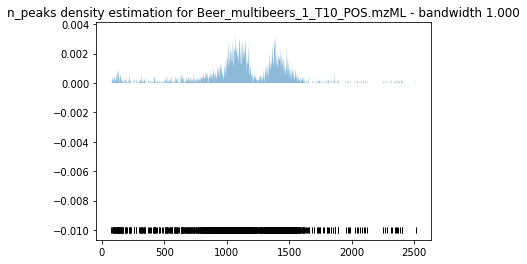

DEBUG  : PeakDensityEstimator           : Retrieving mz_intensity_rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7D3D98128>
INFO   : DataSource                     : Using values from XCMS peaklist
DEBUG  : PeakDensityEstimator           : 3D plotting for mz_intensity_rt not implemented
DEBUG  : PeakDensityEstimator           : Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7D3D98128>


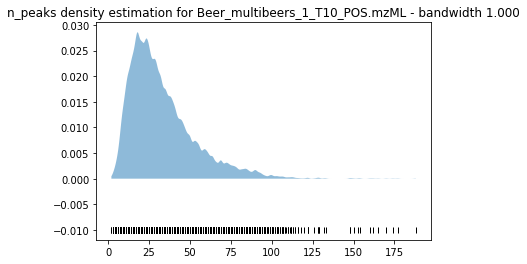

Saving <class 'VMSfunctions.DataGenerator.PeakSampler'> to C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Trained Models\peak_sampler_mz_rt_int_beer1pos_fragmentation.p


In [14]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fragmentation, filename, 1, bandwidth_mz_intensity_rt=1.0, bandwidth_n_peaks=1.0)
densities.kde(ds_fragmentation, filename, 2, bandwidth_mz_intensity_rt=1.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_mz_rt_int_beer1pos_fragmentation.p')

In [15]:
ps.sample(2, 10)

[Peak mz=231.5640 rt=574.67 intensity=1041633.83 ms_level=2,
 Peak mz=443.2190 rt=294.03 intensity=16945.13 ms_level=2,
 Peak mz=162.1454 rt=87.22 intensity=38868.32 ms_level=2,
 Peak mz=271.5442 rt=754.71 intensity=194569.80 ms_level=2,
 Peak mz=375.4496 rt=503.38 intensity=1881725.51 ms_level=2,
 Peak mz=371.0553 rt=288.09 intensity=1139839.01 ms_level=2,
 Peak mz=129.5521 rt=731.74 intensity=489875.19 ms_level=2,
 Peak mz=153.3714 rt=710.21 intensity=811162.45 ms_level=2,
 Peak mz=271.4358 rt=390.19 intensity=946884.64 ms_level=2,
 Peak mz=276.8943 rt=825.44 intensity=235229.18 ms_level=2]

DEBUG  : PeakDensityEstimator           : Retrieving mz_intensity_rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7B904ED68>
INFO   : DataSource                     : Using values from XCMS peaklist
DEBUG  : PeakDensityEstimator           : 3D plotting for mz_intensity_rt not implemented
DEBUG  : PeakDensityEstimator           : Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7B904ED68>


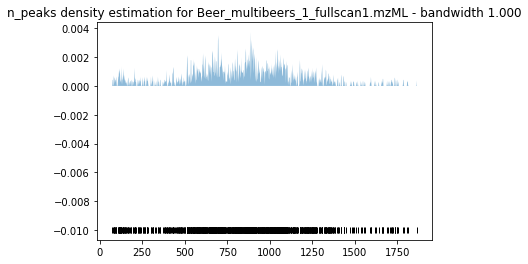

Saving <class 'VMSfunctions.DataGenerator.PeakSampler'> to C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Trained Models\peak_sampler_mz_rt_int_beer1pos_fullscan.p


In [16]:
filename = 'Beer_multibeers_1_fullscan1.mzML'
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fullscan, filename, 1, bandwidth_mz_intensity_rt=1.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_mz_rt_int_beer1pos_fullscan.p')

In [17]:
ps.sample(1, 10)

[Peak mz=191.4357 rt=373.40 intensity=913266.05 ms_level=1,
 Peak mz=234.6545 rt=263.69 intensity=298905.40 ms_level=1,
 Peak mz=340.9598 rt=426.99 intensity=268477.91 ms_level=1,
 Peak mz=271.4363 rt=244.48 intensity=90264.25 ms_level=1,
 Peak mz=334.9172 rt=508.70 intensity=84312.82 ms_level=1,
 Peak mz=167.0620 rt=580.02 intensity=474699.87 ms_level=1,
 Peak mz=226.7047 rt=1103.12 intensity=106788.73 ms_level=1,
 Peak mz=134.7164 rt=279.79 intensity=696906.01 ms_level=1,
 Peak mz=272.3132 rt=3.00 intensity=166983.04 ms_level=1,
 Peak mz=193.8958 rt=884.99 intensity=86733.66 ms_level=1]

## Train on all the 19 beers

DEBUG  : PeakDensityEstimator           : Retrieving mz_intensity_rt values from <vimms.DataGenerator.DataSource object at 0x000001E49F892B00>
INFO   : DataSource                     : Using values from XCMS peaklist
DEBUG  : PeakDensityEstimator           : 3D plotting for mz_intensity_rt not implemented
DEBUG  : PeakDensityEstimator           : Retrieving n_peaks values from <vimms.DataGenerator.DataSource object at 0x000001E49F892B00>


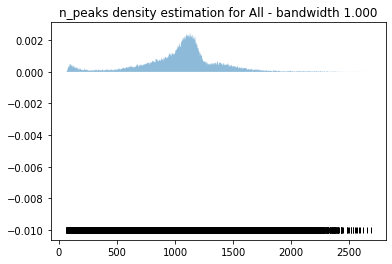

DEBUG  : PeakDensityEstimator           : Retrieving mz_intensity_rt values from <vimms.DataGenerator.DataSource object at 0x000001E49F892B00>
INFO   : DataSource                     : Using values from XCMS peaklist
DEBUG  : PeakDensityEstimator           : 3D plotting for mz_intensity_rt not implemented
DEBUG  : PeakDensityEstimator           : Retrieving n_peaks values from <vimms.DataGenerator.DataSource object at 0x000001E49F892B00>


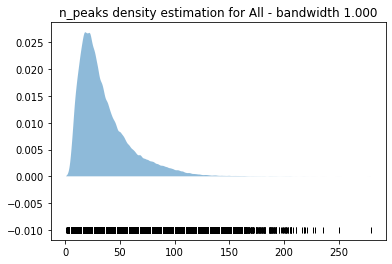

Saving <class 'vimms.DataGenerator.PeakSampler'> to C:\Users\Vinny\work\vimms\data\peak_sampler_mz_rt_int_19_beers_fragmentation.p


In [16]:
filename = None
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fragmentation, filename, 1, bandwidth_mz_intensity_rt=1.0, bandwidth_n_peaks=1.0)
densities.kde(ds_fragmentation, filename, 2, bandwidth_mz_intensity_rt=1.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\Vinny\\work\\vimms\\data\\peak_sampler_mz_rt_int_19_beers_fragmentation.p')

In [19]:
ps.sample(2, 10)

[Peak mz=253.8383 rt=251.00 intensity=110884.55 ms_level=2,
 Peak mz=128.9578 rt=712.61 intensity=1107413.02 ms_level=2,
 Peak mz=250.2972 rt=435.34 intensity=3398092.45 ms_level=2,
 Peak mz=277.5673 rt=595.65 intensity=1127242.36 ms_level=2,
 Peak mz=217.6058 rt=1240.51 intensity=74762.97 ms_level=2,
 Peak mz=86.2465 rt=269.85 intensity=442995.17 ms_level=2,
 Peak mz=272.7945 rt=1379.29 intensity=3466610.53 ms_level=2,
 Peak mz=262.9893 rt=584.47 intensity=505565.78 ms_level=2,
 Peak mz=104.7533 rt=988.26 intensity=26680.62 ms_level=2,
 Peak mz=727.7734 rt=273.87 intensity=53631.57 ms_level=2]

DEBUG  : PeakDensityEstimator           : Retrieving mz_intensity_rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7B904ED68>
INFO   : DataSource                     : Using values from XCMS peaklist
DEBUG  : PeakDensityEstimator           : 3D plotting for mz_intensity_rt not implemented
DEBUG  : PeakDensityEstimator           : Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001E7B904ED68>


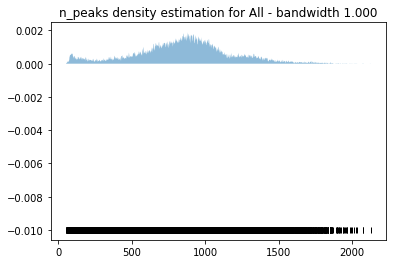

Saving <class 'VMSfunctions.DataGenerator.PeakSampler'> to C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Trained Models\peak_sampler_mz_rt_int_19_beers_fullscan.p


In [20]:
filename = None
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds_fullscan, filename, 1, bandwidth_mz_intensity_rt=1.0, bandwidth_n_peaks=1.0)
ps = PeakSampler(densities)
save_obj(ps, 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Trained Models\\peak_sampler_mz_rt_int_19_beers_fullscan.p')

In [21]:
ps.sample(1, 10)

[Peak mz=120.3420 rt=785.87 intensity=827039.06 ms_level=1,
 Peak mz=222.2886 rt=301.78 intensity=188889.04 ms_level=1,
 Peak mz=272.5686 rt=221.30 intensity=26179.91 ms_level=1,
 Peak mz=144.4015 rt=290.05 intensity=965748.92 ms_level=1,
 Peak mz=389.3452 rt=318.37 intensity=274286.64 ms_level=1,
 Peak mz=175.3436 rt=238.05 intensity=1259413.27 ms_level=1,
 Peak mz=313.7968 rt=533.90 intensity=480279.75 ms_level=1,
 Peak mz=255.9413 rt=1369.39 intensity=15941.22 ms_level=1,
 Peak mz=389.9740 rt=588.95 intensity=915040.60 ms_level=1,
 Peak mz=342.3237 rt=423.83 intensity=2768090.84 ms_level=1]